# Hoja de Trabajo 1


Problema 1:

Desarrolle una funcion la cual reciba dos parametros, una imagen y un entero llamado color, la
funcion debe devolver una imagen la cual tenga activos los canales de color segun los siguientes
puntos:

Si el parametro color vale 1, la imagen debe mostrar activos unicamente el color azul.
Si el parametro color vale 2, la imagen debe mostrar activos unicamente el color verde.
Si el parametro color vale 3, la imagen debe mostrar activos unicamente el color rojo.
Si el parametro color vale 10, la imagen debe mostrar activos unicamente los colores rojo y
verde.
Si el parametro color vale 20, la imagen debe mostrar activos unicamente los colores verde y
azul.
Si el parametro color vale 30, la imagen debe mostrar activos unicamente los colores azul y
rojo.

In [64]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [27]:
def procesamiento(imagen, color):

    red, green, blue = cv2.split(img)
    
    valor = np.zeros_like(red)
    if color == 1:
        nueva_imagen = cv2.merge([valor, valor, blue])
    elif color == 2:
        nueva_imagen = cv2.merge([valor, green, valor])
    elif color == 3:
        nueva_imagen = cv2.merge([red, valor, valor])
    elif color == 10:
        nueva_imagen = cv2.merge([red, green, valor])
    elif color == 20:
        nueva_imagen = cv2.merge([valor, green, blue])
    elif color == 30:
        nueva_imagen = cv2.merge([red, valor, blue])
    else:
        nueva_imagen = imagen
    return nueva_imagen



In [33]:
imagen_cargada = cv2.imread("Perro.jpg")
img = cv2.cvtColor(imagen_cargada, cv2.COLOR_BGR2RGB) 
color = 30 
nueva_imagen = procesamiento(imagen_cargada, color)

plt.imshow(nueva_imagen)
plt.title("Imagen")
plt.axis('off')
plt.show()

En el .zip del laboratorio se le compartio un conjunto de imagenes en escala de grises (imagen1,
imagen2, perro) estas imagenes fueron creadas utilizando una escala de grises en 3D, cree una
funcion que dadas las 3 imagenes se construya la imagen original a color.

In [19]:

def construccion_imagen(ubicacion_carpeta):
    img_rojo_path = f"{ubicacion_carpeta}/rojo.jpg"
    img_verde_path = f"{ubicacion_carpeta}/verde.jpg"
    img_azul_path = f"{ubicacion_carpeta}/azul.jpg"

    red = cv2.imread(img_rojo_path, cv2.IMREAD_GRAYSCALE)
    green = cv2.imread(img_verde_path, cv2.IMREAD_GRAYSCALE)
    blue = cv2.imread(img_azul_path, cv2.IMREAD_GRAYSCALE)


    empty_canvas = np.zeros_like(blue)
    blue_colored = cv2.merge([blue, empty_canvas, empty_canvas])
    green_colored = cv2.merge([empty_canvas, green, empty_canvas])

    red_colored = cv2.merge([empty_canvas, empty_canvas, red])

    colored_mosaic = np.hstack([red_colored, green_colored, blue_colored])
    cv2.imshow('Rojo | Verde | Azul (Coloreado)', colored_mosaic)
    cv2.waitKey(0)
    original_reconstructed = cv2.merge([blue, green, red])
    cv2.imshow('Original (reconstruida)', original_reconstructed)
    cv2.waitKey(0)

In [27]:
ubicacion_imagen1 = 'C:/Users/dagam/OneDrive - Universidad Galileo/Escritorio/imagen1'
ubicacion_imagen1
ubicacion_imagen2 = 'C:/Users/dagam/OneDrive - Universidad Galileo/Escritorio/imagen2'
ubicacion_imagen2
ubicacion_imagen3 = 'C:/Users/dagam/OneDrive - Universidad Galileo/Escritorio/perro'
ubicacion_imagen3

'C:/Users/dagam/OneDrive - Universidad Galileo/Escritorio/perro'

In [31]:
imagen1_color = construccion_imagen(ubicacion_imagen1)

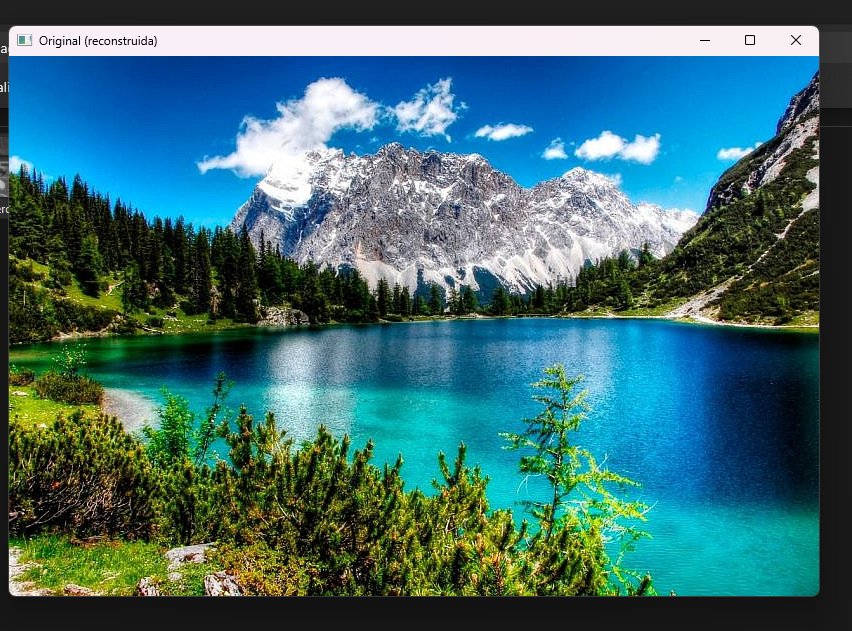

In [32]:
imagen2_color = construccion_imagen(ubicacion_imagen2)

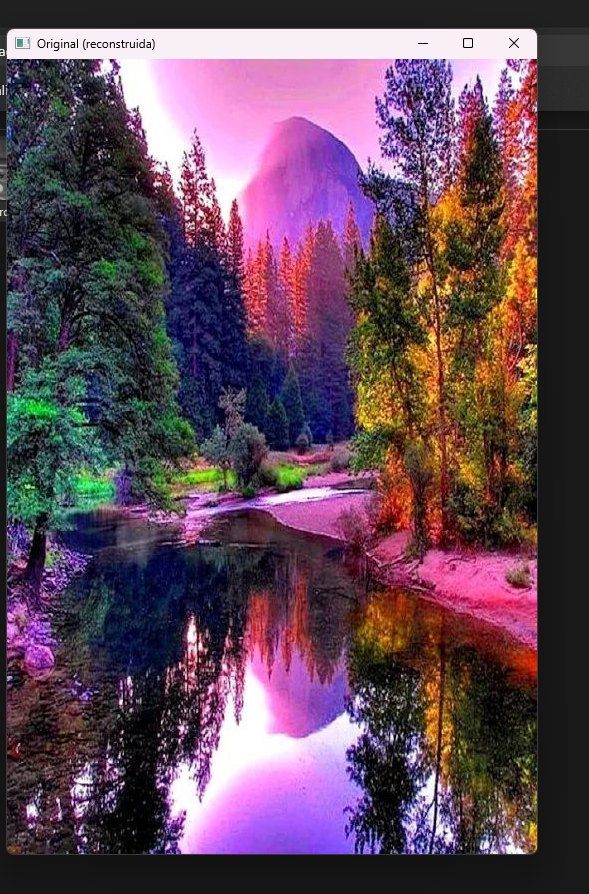

In [33]:
imagen2_color = construccion_imagen(ubicacion_imagen3)

# Ejercicio 3

Cree una funcion que dada una imagen cree una escala de grises en tres dimensiones, tome en
cuenta que su funcion debe crear 3 imagenes como salida. Para entregar este ejercicio debe incluir
una las imagenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la
imagen del Problema #2.

In [37]:
imagen_cargada = cv2.imread("Perro.jpg")
cv2.imshow('Original', imagen_cargada)
cv2.waitKey(0)



-1

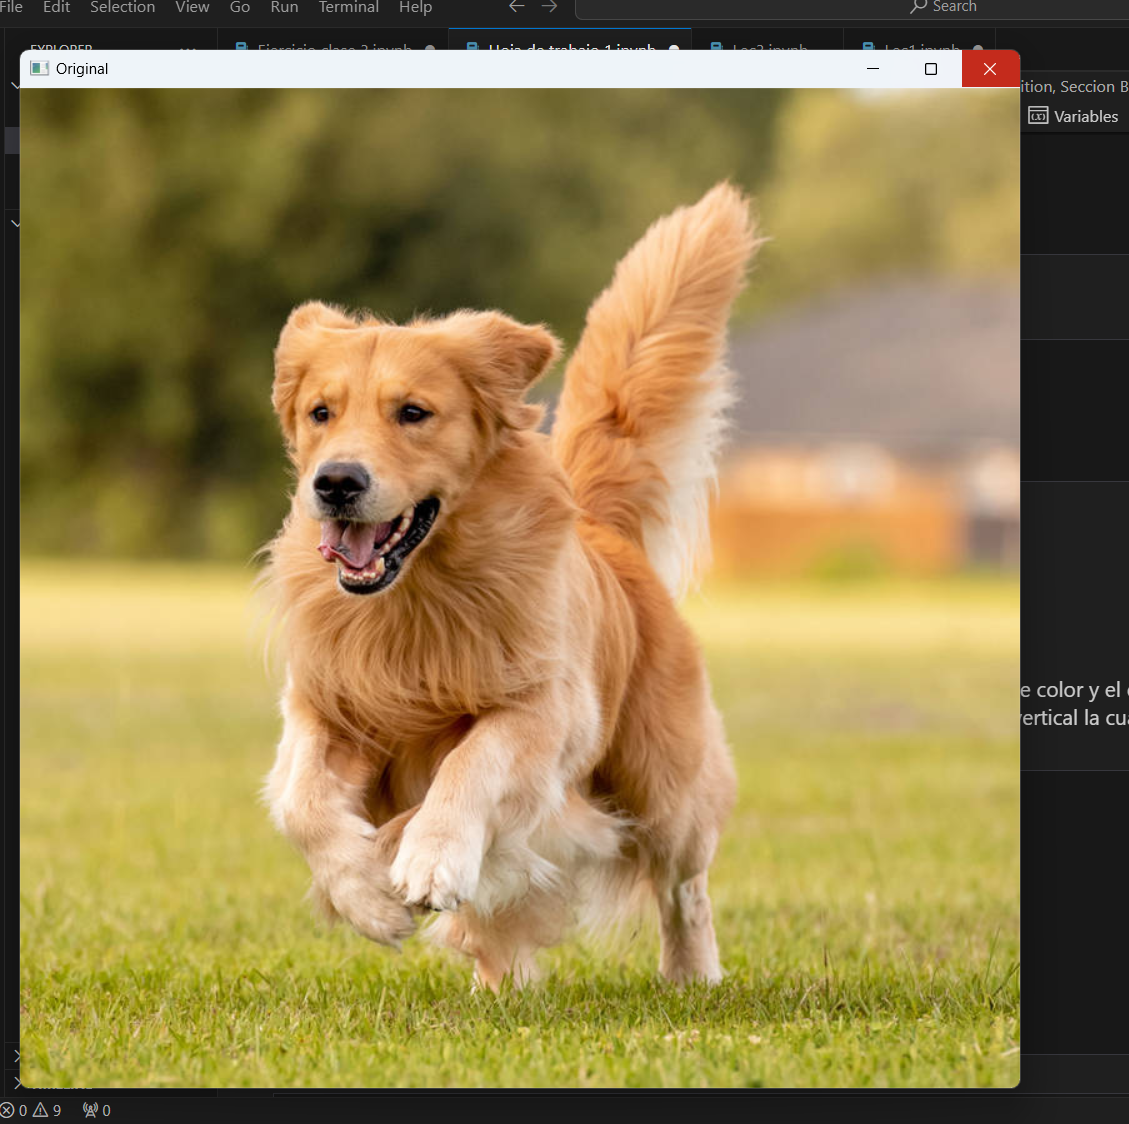

In [38]:
blue, green, red = cv2.split(imagen_cargada)
color_mosaic = np.hstack([red, green, blue])
cv2.imshow('Rojo | Verde | Azul : ', color_mosaic)
cv2.waitKey(0)

-1

# Ejercicio 4

Cree una funcion que dada una imagen, muestre el histograma de cada canal de color y el de
escala de grises (utilice un promedio aritmetico para su escala de grises, no puede usar funciones
de opencv), sus histogramas deben incluir una línea vertical la cual muestre el valor de la media
de la distribucion.

In [71]:
rgb = cv2.imread("Perro.jpg")
rgb = cv2.cvtColor(imagen_cargada, cv2.COLOR_BGR2RGB) 

In [79]:
def histogramas(imagen):
    r = rgb[:, :, 0].flatten()
    g = rgb[:, :, 1].flatten()
    b = rgb[:, :, 2].flatten()
    escalagris = (r + g + b)/ 3

    media_r = np.mean(r)
    media_g = np.mean(g)
    media_b = np.mean(b)
    media_gris = np.mean(escalagris)


    plt.hist(r, bins=range(257), color='r', alpha=1, edgecolor='none', label='Red')
    plt.hist(g, bins=range(257), color='g', alpha=0.7, edgecolor='none', label='Green')
    plt.hist(b, bins=range(257), color='b', alpha=0.7, edgecolor='none', label='Blue')
    plt.hist(escalagris, bins=range(257), color='gray', alpha=0.7, edgecolor='none', label='Grayscale')

    plt.axvline(media_r, color='r', linestyle='dashed', linewidth=1, label='Mean Red')
    plt.axvline(media_g, color='g', linestyle='dashed', linewidth=1, label='Mean Green')
    plt.axvline(media_b, color='b', linestyle='dashed', linewidth=1, label='Mean Blue')
    plt.axvline(media_gris, color='gray', linestyle='dashed', linewidth=1, label='Mean Grayscale')


    plt.xlabel('RGB value')
    plt.ylabel('Frecuencia')
    plt.title('Histrograma de Canales')
    plt.xlim([0, 256])
    plt.legend()
    plt.show()

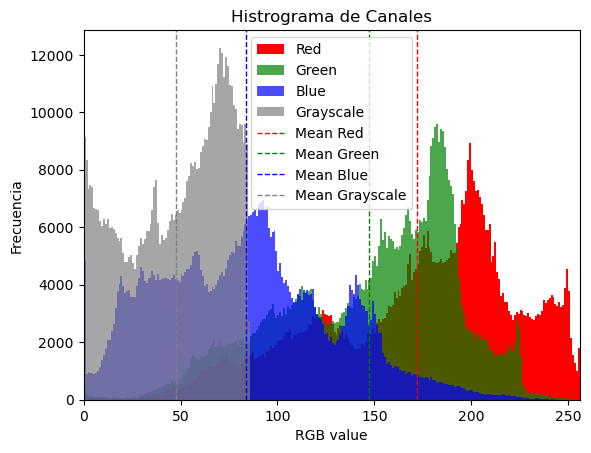

In [80]:
histogramas(rgb)

# Ejercicio 5

Investigue en que consiste el enfoque de escala de grises ponderado, luego de esto implemente una
funcion que dada una imagen, realice una escala de grises ponderada (notar que no existe una
solucion unica).

El enfoque de grises ponderados se refiere a la conversión que se le realiza a una imagen sobre la escala de grises, enfocandose en las intesidades de la luz.
Este método se realiza por medio de una expresión matemática que podera cada componente en función a la sensibilidad que tiene el ojo humano, siendo un 30% para el color rojo, 59% verde y azul un 11%.

In [53]:
img = cv2.imread("Perro.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converte de bgr a rgb

In [54]:
alto = img.shape[0]
ancho = img.shape[1]

In [55]:
img_gris_pond= np.zeros((alto, ancho, 1))

In [57]:
for i in range(0,alto):
    for j in range(0, ancho):
        pixel = img[i,j]

        blue=pixel[2]
        green = pixel[1]
        red = pixel[0]
        gris =pixel.mean()
        img_gris_pond[i,j] = (0.3 *blue + 0.59*green + 0.11*blue)


In [62]:
cv2.imwrite("gris_ponderado.jpg", img_gris_pond)

gris_ponderado = cv2.imread("gris_ponderado.jpg")
gris_ponderado = cv2.cvtColor(gris_ponderado, cv2.COLOR_BGR2RGB)

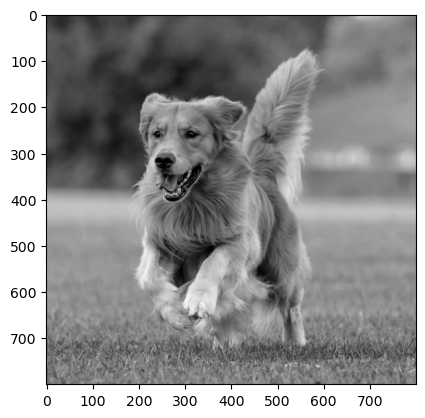

In [63]:
plt.imshow(gris_ponderado)
plt.show()

# Ejercicio 6

Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho
espacio, para entregar este ejercicio puede hacerlo por medio de Markdown en el mismo Notebook
donde trabajo los demas ejercicios.

HSV se compone por las siglas de Hue (tono), Saturation (saturación) y Value or Brightness (Brillo). También se conoce como HSB. 

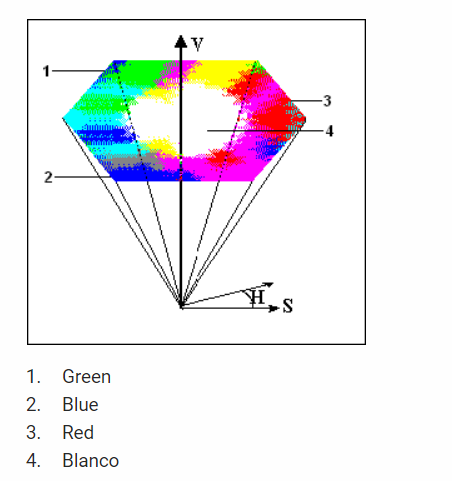

La saturación sirve para conocer la longitud de la línea radial entre el blanco y el color del píxel. 
El valor se refiere a la punta del cono.
Por último, la matiz es el ángulo en grados, que está medido desde la línea entre blanco y el rojo. Un aspecto importante, es que el HSV solo puede tener saturación máxima si el valor está en su máximo de 1. 